In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("ans_benchmark.csv").drop('Unnamed: 0', axis=1)
df

,coder,time,n_codes,repeat
0,ans,0.089483,10,0
1,ans,0.094136,10,1
2,ans,0.096156,10,2
3,vans_cpu,0.500660,10,0
4,vans_cpu,0.476012,10,1
...,...,...,...,...
886,vans_cpu,1.419717,990,1
887,vans_cpu,1.411922,990,2
888,vans_gpu,2.557219,990,0
889,vans_gpu,2.530289,990,1


In [46]:
agg_df = df.groupby(
    ["n_codes", "coder", ]
).agg(["mean", "std"]).time.reset_index()

agg_df

,n_codes,coder,mean,std
0,10,ans,0.093258,0.003422
1,10,vans_cpu,0.484224,0.014234
2,10,vans_gpu,2.187090,0.021857
3,20,ans,0.175062,0.000425
4,20,vans_cpu,0.485349,0.001055
...,...,...,...,...
292,980,vans_cpu,1.401452,0.003659
293,980,vans_gpu,2.544809,0.007804
294,990,ans,9.010758,0.019977
295,990,vans_cpu,1.436096,0.035335


In [65]:
agg_df[agg_df.n_codes==100]

,n_codes,coder,mean,std
27,100,ans,0.872063,0.001904
28,100,vans_cpu,0.598673,0.037514
29,100,vans_gpu,2.218663,0.001490


In [47]:
df_coder

,n_codes,coder,mean,std
2,10,vans_gpu,2.161812,0.001732
5,20,vans_gpu,2.170523,0.001510
8,30,vans_gpu,2.169704,0.001779
11,40,vans_gpu,2.177637,0.002717
14,50,vans_gpu,2.175084,0.001875
17,60,vans_gpu,2.191983,0.006314
20,70,vans_gpu,2.208950,0.005106
23,80,vans_gpu,2.208075,0.001933
26,90,vans_gpu,2.214596,0.003558
29,100,vans_gpu,2.211900,0.004584


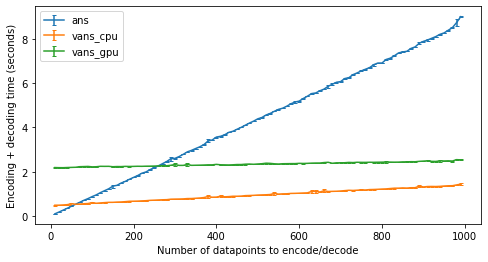

In [67]:
plt.figure(figsize=(8, 4))

for coder in df.coder.unique():
    df_coder= agg_df[agg_df.coder==coder]
    
    plt.errorbar(
        df_coder.n_codes,
        df_coder["mean"],
        label=coder,
        yerr=df_coder["std"],
#         ecolor="black",
        capsize=2
    )
    
    plt.errorbar

plt.legend()
plt.xlabel("Number of datapoints to encode/decode")
plt.ylabel("Encoding + decoding time (seconds)")
plt.show()